In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import learn2learn as l2l
from models import SIREN
from tqdm import tqdm
import os
from icecream import ic

import config

# Assume models are saved in a list of file paths
group_name = "nyx_all"

ind = 10
model_paths = []
while os.path.exists(config.model_dir+f'{group_name}/eval_{ind}.pth'):
    model_paths.append(config.model_dir+f'{group_name}/eval_{ind}.pth')
    ind += 1
    # if ind >= 270:
    #     break

config.seed_everything(43)


# Function to extract features
def extract_weights(model):
    return torch.cat([p.data.view(-1) for p in model.parameters()])


# Collect all features
all_weights = []

for idx, model_path in enumerate(tqdm(model_paths)):
    # Load the model
    net = SIREN(in_features=3, out_features=1, init_features=64, num_res=5)
    model = l2l.algorithms.MAML(net, lr=0.0005, first_order=True).to(config.device)
    try:
        model.net.load_state_dict(torch.load(model_path))
    except Exception as e:
        model.load_state_dict(torch.load(model_path))
    weights = extract_weights(model.net)
    all_weights.append(weights.cpu().numpy())

# Concatenate features from all models
all_weights = np.asarray(all_weights)

In [ ]:
# Apply t-SNE

tsne = TSNE(n_components=2, random_state=45, perplexity=100)
tsne_results = tsne.fit_transform(all_weights)
print(all_weights.shape)

# get the length between each centroid
lengths = []
for idx in range(1, len(model_paths)):
    lengths.append(np.linalg.norm(tsne_results[idx]-tsne_results[idx-1]))

total_length = np.sum(lengths)
num_select = 20
target_length = total_length/num_select
# select 20 models based on length, should be even across length
selected_models = []
current_length = 0

for idx in range(1, len(model_paths)):
    current_length += lengths[idx-1]
    if current_length>=target_length:
        selected_models.append(idx)
        current_length -= target_length

# random colors
colors = np.random.rand(len(model_paths), 3)

In [3]:
nyx_models = ['/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.021500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.021500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.021500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.021500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.022500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.022500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.022500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.022500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.022500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.023500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.023500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.023500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.023500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120000-OmB_0.023500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.120795-OmB_0.021545-h_0.556818-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.121207-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.121591-OmB_0.021591-h_0.563636-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.122386-OmB_0.021636-h_0.570455-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.122414-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.123182-OmB_0.021682-h_0.577273-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.123621-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.123977-OmB_0.021727-h_0.584091-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.124773-OmB_0.021773-h_0.590909-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.124828-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.125568-OmB_0.021818-h_0.597727-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.126034-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.126364-OmB_0.021864-h_0.604545-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.127159-OmB_0.021909-h_0.611364-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.127241-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.127955-OmB_0.021955-h_0.618182-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.128448-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.128750-OmB_0.022000-h_0.587500-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.128750-OmB_0.022000-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.129545-OmB_0.022045-h_0.631818-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.129655-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.130341-OmB_0.022091-h_0.638636-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.130862-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.131136-OmB_0.022136-h_0.645455-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.131932-OmB_0.022182-h_0.652273-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.132069-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.132727-OmB_0.022227-h_0.659091-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.133276-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.133523-OmB_0.022273-h_0.665909-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.134318-OmB_0.022318-h_0.672727-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.134483-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.135114-OmB_0.022364-h_0.679545-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.135690-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.135909-OmB_0.022409-h_0.686364-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.136705-OmB_0.022455-h_0.693182-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.136897-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.021500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.021500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.022500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.022500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.022500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.023500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.023500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137000-OmB_0.023500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.021500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.021500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.021500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.021500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.022500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.022500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.022500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.022500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.022500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.023500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.023500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.023500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.023500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.137500-OmB_0.023500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.138103-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.138295-OmB_0.022545-h_0.706818-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.139091-OmB_0.022591-h_0.713636-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.139310-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.139886-OmB_0.022636-h_0.720455-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.140517-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.140682-OmB_0.022682-h_0.727273-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.141477-OmB_0.022727-h_0.734091-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.141724-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.142273-OmB_0.022773-h_0.740909-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.142931-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.143068-OmB_0.022818-h_0.747727-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.143864-OmB_0.022864-h_0.754545-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.144138-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.144659-OmB_0.022909-h_0.761364-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.145345-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.145455-OmB_0.022955-h_0.768182-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.146250-OmB_0.023000-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.146552-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.147045-OmB_0.023045-h_0.781818-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.147759-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.147841-OmB_0.023091-h_0.788636-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.148636-OmB_0.023136-h_0.795455-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.148966-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.149432-OmB_0.023182-h_0.802273-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.150172-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.150227-OmB_0.023227-h_0.809091-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.151023-OmB_0.023273-h_0.815909-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.151379-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.151818-OmB_0.023318-h_0.822727-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.152586-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.152614-OmB_0.023364-h_0.829545-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.153409-OmB_0.023409-h_0.836364-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.153793-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.154205-OmB_0.023455-h_0.843182-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.560345-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.570690-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.581034-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.591379-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.601724-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.612069-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.622414-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.632759-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.643103-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.653448-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.663793-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.674138-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.684483-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.694828-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.705172-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.715517-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.725862-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.736207-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.746552-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.756897-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.767241-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.777586-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.787931-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.798276-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.808621-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.818966-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.829310-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.839655-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021569-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021638-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021707-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021776-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021845-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021914-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.021983-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022052-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022121-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022190-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022259-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022328-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022397-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022466-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022500-h_0.850000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022534-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022603-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022672-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022741-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022810-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022879-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.022948-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023017-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023086-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023155-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023224-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023293-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023362-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023431-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.550000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.560345-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.570690-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.581034-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.591379-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.601724-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.612069-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.622414-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.625000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.632759-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.643103-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.653448-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.663793-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.674138-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.684483-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.694828-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.700000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.705172-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.715517-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.725862-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.736207-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.746552-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.756897-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.767241-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.775000-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.777586-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.787931-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.798276-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.808621-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.818966-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.829310-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.839655-400.raw',
              '/scratch365/myang9/data/nyx/all/OmM_0.155000-OmB_0.023500-h_0.850000-400.raw']

In [4]:
# from nyx variables, show which OmM var is the most common
from collections import Counter
# OmM = [nyx.split('-')[0].split('_')[1] for nyx in nyx_models]
# Counter(OmM)
OmB = [nyx.split('-')[1].split('_')[1] for nyx in nyx_models]
Counter(OmB)

Counter({'0.021500': 74,
         '0.023500': 46,
         '0.022500': 18,
         '0.022000': 2,
         '0.021545': 1,
         '0.021591': 1,
         '0.021636': 1,
         '0.021682': 1,
         '0.021727': 1,
         '0.021773': 1,
         '0.021818': 1,
         '0.021864': 1,
         '0.021909': 1,
         '0.021955': 1,
         '0.022045': 1,
         '0.022091': 1,
         '0.022136': 1,
         '0.022182': 1,
         '0.022227': 1,
         '0.022273': 1,
         '0.022318': 1,
         '0.022364': 1,
         '0.022409': 1,
         '0.022455': 1,
         '0.022545': 1,
         '0.022591': 1,
         '0.022636': 1,
         '0.022682': 1,
         '0.022727': 1,
         '0.022773': 1,
         '0.022818': 1,
         '0.022864': 1,
         '0.022909': 1,
         '0.022955': 1,
         '0.023000': 1,
         '0.023045': 1,
         '0.023091': 1,
         '0.023136': 1,
         '0.023182': 1,
         '0.023227': 1,
         '0.023273': 1,
         '0.0

In [30]:
keyword = "OmM_0.155000"

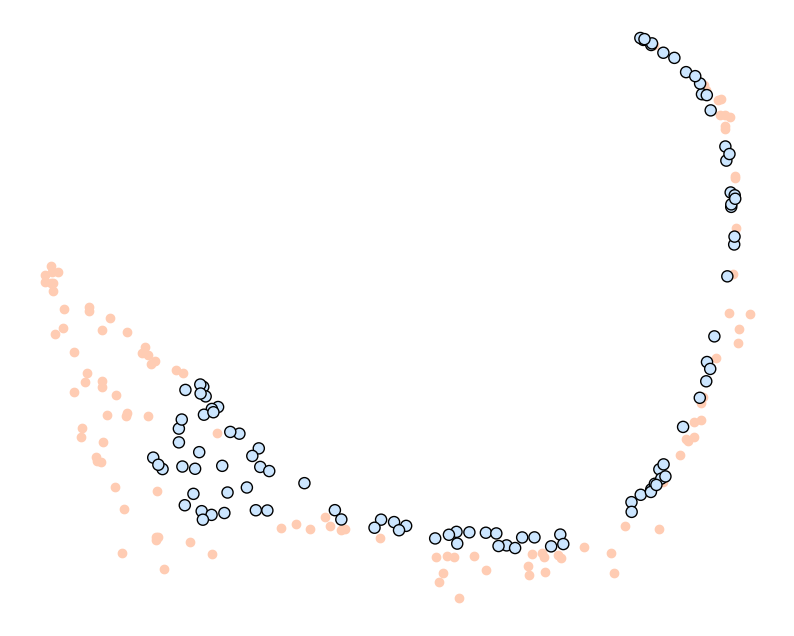

In [31]:
from matplotlib import patheffects

prev_center = []
# Plotting
plt.figure(figsize=(10, 8))

black = [0, 0, 0]
red = [1, 0, 0]
white = [1, 1, 1]
blue = [0.8, 0.9, 1.0]
orange = [1.0, 0.8, 0.7]

normal_plots = []
highlighted_plots = []
for idx in range(len(model_paths)):
    x = tsne_results[idx, 0]
    y = tsne_results[idx, 1]

    if keyword in nyx_models[idx]:
        highlighted_plots.append((x, y))
    else:
        normal_plots.append((x, y))
        
for x, y in normal_plots:
    plt.scatter(x, y, color=orange)
for x, y in highlighted_plots:
    plt.scatter(x, y, color=blue, path_effects=[
        patheffects.withStroke(linewidth=3, foreground="black") # <-- Black outline!
    ])

# remove axis ticks
plt.xticks([])
plt.yticks([])

# get current x and y limits
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()

plt.axis('off')

# r = 0.1
# plt.xlim(x0-r*(x1-x0), x1+r*(x1-x0))
# plt.ylim(y0-r*(y1-y0), y1+r*(y1-y0))
plt.savefig(f"tsne_nyx_{keyword}.png")
plt.show()